In [32]:
from explainers.gnninterpreter import *
import torch
from tqdm.auto import trange

In [33]:
shape = ShapeDataset(seed=12345)
shape_train, shape_val = shape.train_test_split(k=10)
shape_model = GCNClassifier(node_features=len(shape.NODE_CLS),
                            num_classes=len(shape.GRAPH_CLS),
                            hidden_channels=64,
                            num_layers=4)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f1431441cc0>>
Traceback (most recent call last):
  File "/home/sobibence/AAU/2_semester/project/GraBaNN/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
shape.GRAPH_CLS.items()

dict_items([(0, 'random'), (1, 'lollipop'), (2, 'wheel'), (3, 'grid'), (4, 'star')])

In [ ]:
for epoch in trange(8):
    train_loss = shape_train.fit_model(shape_model, lr=0.0001)
    train_f1 = shape_train.evaluate_model(shape_model)
    val_f1 = shape_val.evaluate_model(shape_model)
    print(f'Epoch: {epoch:03d}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Train F1: {train_f1}, '
          f'Test F1: {val_f1}')

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:08<00:56,  8.10s/it]

Epoch: 000, Train Loss: 1.6030, Train F1: {'random': 0.24222585558891296, 'lollipop': 0.0, 'wheel': 0.3353753983974457, 'grid': 0.0, 'star': 0.0}, Test F1: {'random': 0.2531645596027374, 'lollipop': 0.0, 'wheel': 0.3768472969532013, 'grid': 0.0, 'star': 0.0}


 25%|██▌       | 2/8 [00:15<00:44,  7.49s/it]

Epoch: 001, Train Loss: 1.5848, Train F1: {'random': 0.2554161846637726, 'lollipop': 0.0, 'wheel': 0.33840999007225037, 'grid': 0.0, 'star': 0.0}, Test F1: {'random': 0.2744063436985016, 'lollipop': 0.0, 'wheel': 0.3818424642086029, 'grid': 0.0, 'star': 0.0}


 38%|███▊      | 3/8 [00:22<00:36,  7.26s/it]

Epoch: 002, Train Loss: 1.5494, Train F1: {'random': 0.2957105338573456, 'lollipop': 0.0, 'wheel': 0.4303482472896576, 'grid': 0.0, 'star': 0.8703030347824097}, Test F1: {'random': 0.30248308181762695, 'lollipop': 0.0, 'wheel': 0.47183099389076233, 'grid': 0.0, 'star': 0.8731343150138855}


 50%|█████     | 4/8 [00:29<00:28,  7.22s/it]

Epoch: 003, Train Loss: 1.4582, Train F1: {'random': 0.23619185388088226, 'lollipop': 0.03717948868870735, 'wheel': 0.6056644916534424, 'grid': 0.3889661431312561, 'star': 0.90823894739151}, Test F1: {'random': 0.22857142984867096, 'lollipop': 0.011363636702299118, 'wheel': 0.6169666051864624, 'grid': 0.39915966987609863, 'star': 0.91756272315979}


 62%|██████▎   | 5/8 [00:36<00:21,  7.28s/it]

Epoch: 004, Train Loss: 1.3091, Train F1: {'random': 0.3641488254070282, 'lollipop': 0.0, 'wheel': 0.7003698945045471, 'grid': 0.5004566311836243, 'star': 0.9141747355461121}, Test F1: {'random': 0.3582887649536133, 'lollipop': 0.0, 'wheel': 0.6905537247657776, 'grid': 0.5094736814498901, 'star': 0.9290780425071716}


 75%|███████▌  | 6/8 [00:43<00:14,  7.28s/it]

Epoch: 005, Train Loss: 1.1446, Train F1: {'random': 0.1750841736793518, 'lollipop': 0.34696754813194275, 'wheel': 0.7713476419448853, 'grid': 0.46216657757759094, 'star': 0.9372861981391907}, Test F1: {'random': 0.13698630034923553, 'lollipop': 0.3144329786300659, 'wheel': 0.7524116039276123, 'grid': 0.4336734712123871, 'star': 0.9586206674575806}


 88%|████████▊ | 7/8 [00:50<00:07,  7.17s/it]

Epoch: 006, Train Loss: 1.0121, Train F1: {'random': 0.28884825110435486, 'lollipop': 0.21715913712978363, 'wheel': 0.8223024606704712, 'grid': 0.4675936698913574, 'star': 0.9516310691833496}, Test F1: {'random': 0.2666666805744171, 'lollipop': 0.1753246784210205, 'wheel': 0.8291139006614685, 'grid': 0.4618736505508423, 'star': 0.965753436088562}


100%|██████████| 8/8 [00:58<00:00,  7.25s/it]

Epoch: 007, Train Loss: 0.9068, Train F1: {'random': 0.5229050517082214, 'lollipop': 0.007398273795843124, 'wheel': 0.8528000116348267, 'grid': 0.5513999462127686, 'star': 0.9644444584846497}, Test F1: {'random': 0.5156794190406799, 'lollipop': 0.011363636702299118, 'wheel': 0.8553459048271179, 'grid': 0.5638095140457153, 'star': 0.9727891087532043}


In [ ]:
torch.save(shape_model.state_dict(), 'model/shape.pt')

In [ ]:
dataset = ShapeDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=4)
model.load_state_dict(torch.load('model/shape.pt'))

<All keys matched successfully>

In [ ]:
dataset.evaluate_model(model)

{'random': 0.5222072601318359,
 'lollipop': 0.007786429487168789,
 'wheel': 0.853087306022644,
 'grid': 0.5526024103164673,
 'star': 0.965263843536377}

In [ ]:
mean_embeds = dataset.mean_embeddings(model)
trainer = {}
sampler = {}

In [ ]:
cls_idx = 1
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=25,
        temperature=0.15,
        learn_node_feat=False
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=1),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=5),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=1),
        dict(key="omega", criterion=NormPenalty(order=2), weight=1),
        # dict(key="xi", criterion=NormPenalty(order=1), weight=0),
        # dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=15),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=10, order=2, beta=1),
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)
trainer[1].train(2000)

100%|██████████| 2000/2000 [02:41<00:00, 12.40it/s, size=9.89, bpw=2.8e-45, random=0.348, lollipop=0.32, wheel=-0.494, grid=0.213, star=-0.88]        


False

n=6 m=9
logits=[0.3754749000072479, 0.36336010694503784, -0.5339004397392273, 0.285086452960968, -1.1056934595108032]
probs=[0.28315117955207825, 0.2797415554523468, 0.11404643207788467, 0.25868019461631775, 0.06438061594963074]


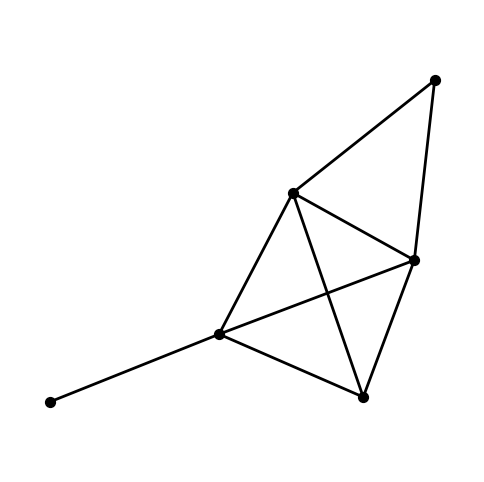

In [ ]:
trainer[1].evaluate(threshold=0.5, show=True)